##### Instructions
- Keep the original structure, you may add additional code cells and/or mark-down cells for clarity, legibility and/or structure.
- Add the required descriptions, explanations, justifications to the mark-down cells. You can find more mark-down tips & tricks online, for example [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) and [here](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)

# EXAM03: Data Science Group Assignment - Iteration 1

**Group name:** Timo & Jakub

**Student names & numbers:**
* Timo Storny - 00099699
* Jakub Holik - [Student no.]
* [Name 3] - [Student no.]


---

## 0. Iteration setup

**Import libraries**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Load dataset(s)**

In [9]:
df = pd.read_csv("ship_inventory.csv", sep=',')

---

## 1. Business Understanding
*Rubric: LO 6.4D (Reflection on Process)*

**Situation description**

Nebula Brokerage currently prices spaceships using "gut feeling" and rough averages. This is risky, because the inventory prices are highly spread and include extreme outliers, which makes the average inaccurate. Also with this much price variation, it becomes more diffcult to consistently price incoming ships and it may lead to underpricing rare ships (lost profit) or overpricing common ships (low sales and sitting inventory).

**Business objective(s)**

Nebula Brokerage needs a data-driven baseline price that can be used as a standard reference for incoming ships, before building complex AI models. This baseline should:
 - Provide a consistent starting point for pricing decisions.
 - Provide a statistically derived benchmark that will minimize average error

**Data mining goal(s)**

We are going to use naive regression models (mean and median) to determine the best baseline price without knowing anything about the incoming ships. This should minimize the Mean Absolute Error (MAE) and Root Mean Squared Error (EMSE). 

**Success criteria**

We successfully deliver a single baseline reference price for incoming ships that:
- Is derived from the dataset
- Minimizes prediction error without any incoming ship details:
  - Use median as the baseline if optimizing MAE
  - Use mean as the basline if optimizing RMSE
- Includes benchmark performance numbers (MAE and RMSE), so future models can be compared against it

---

## 2. Data Understanding
*Rubric: LO 7.3Q (Visuals) & LO 6.4C (Process)*

**Data exploration**

*Include summary statistics and descriptions of data types below. Describe your findings.*

In [85]:
# df['Galactic_Credits'].mean()
df['Galactic_Credits'].median()
# df['Galactic_Credits'].std()

np.float64(15990.0)

**Visualizations and patterns**

*Discover patterns in the data by creating visualizations. Create at least a histogram of Galactic_Credits. Describe your observations.*

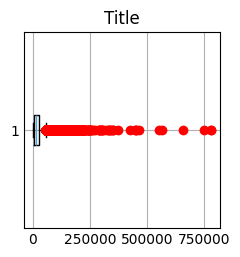

In [112]:
# plt.hist(x=df['Galactic_Credits'], bins=100)
# plt.xlabel("Galactic Credits")
# plt.ylabel("Amount of Ships")
# plt.show()
# # plt.boxplot(df['Galactic_Credits'])
# # plt.show()
# fig, axs = plt.subplots()
# axs.boxplot(df['Galactic_Credits'], sym="r", orientation='horizontal')
# axs.set_title('Title')
# plt.style.use('_mpl-gallery')
# col = "Galactic_Credits"
# x = df[col].dropna()

# plt.figure()
# plt.hist(x, bins=30)
# plt.title(f"Distribution of {col}")
# plt.xlabel(col)
# plt.ylabel("Count")
# # plt.tight_layout()
# plt.show()

**Data insights and data quality**
* **Insights:** What are the key trends? What does the distribution look like? What does that mean? 
* **Quality issues:** Document missing values, duplicates, outliers, etc.

---

## 3. Data Preparation
*Rubric: LO 6.4C (Data Science Steps)*

**Cleaning and preprocessing**
*Describe and justify steps taken (e.g., imputation, handling outliers, fixing other errors).*

In [52]:
# CODE CELL: Data cleaning and preprocessing steps

**Adjusting dataset (optional)**
*If you adjusted the dataset for modeling in additional ways, describe that here*

In [53]:
# OPTIONAL CODE CELL: Additional preprocessing steps

---

## 4. Modeling
*Rubric: LO 6.4C (Data Science Steps)*

**Model setup**
*Describe and justify the creation of your simple benchmark model to predict Galactic_Credits*

In [54]:
# CODE CELL: Model training and setup code

**Testing and performance**
*Describe how you tested the model and interpret the metrics. Make sure to present the metrics in a clear overview.*

In [55]:
# CODE CELL: Model evaluation code

---

## 5. Evaluation
*Rubric: LO 6.4C (Results vs. Objectives)*

**Assessment against succes criteria** 
*What is the difference between the metrics? What does this mean? Did you meet the goals set in the Business Understanding?*

**Key findings and limitations**
*What did you learn? What are the limitations of this current model?*

---

## 6 Personal Contribution
*Rubric: LO 7.3P (Equal Contribution)*

| Student name | Contribution | Personal lessons learned |
| :--- | :--- | :--- |
| Student name 1 | *Contribution description* | *Personal lessons learned this iteration* |
| Student name 2 | *Contribution description* | *Personal lessons learned this iteration* |
| Student name 3 | *Contribution description* | *Personal lessons learned this iteration* |